#Métodos abiertos
A diferencia de los métodos cerrados, donde se parte de conocer un intervalo en el cual se encuentra el cero de la función que se desea calcular; los métodos abiertos están basados en fórmulas que solo necesitan un valor de $x$ o dos valores iniciales que no necesariamente encierran a la raíz. Como tal, a veces *divergen* o se mueven lejos de la raíz real conforme el cálculo avanza. Sin embargo, cuando los métodos convergen, usualmente se acercan a la raíz real más rápido que los métodos cerrados. A continuación se muestran los principales métodos y sus códigos correspondientes.

In [ ]:
#Código hecho por: Diana Ailed Hernández Bustos

from  math import*
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import  root_scalar

#Gráfica de la función

Text(0, 0.5, 'f(x)')

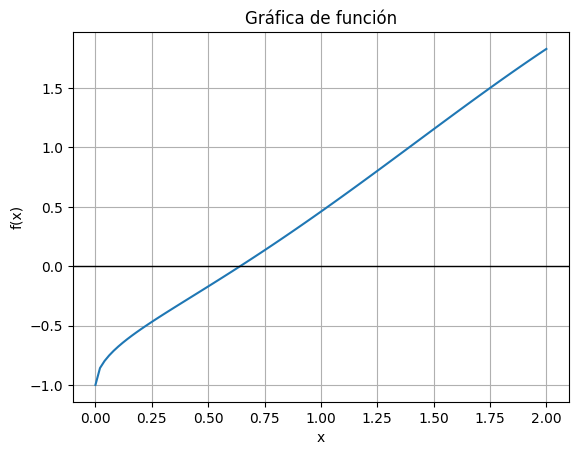

In [ ]:
#Definiendo la función
def f(x):
    return (sqrt(x) - cos(x))

#Gráfica:
k = 100
x = np.linspace(0, 2, k)
y = np.zeros(k)

for i in range (k):
    y[i] = f(x[i])

plt.plot (x, y)
plt.grid()
plt.axhline(y=0,linewidth=1, c='k')
plt.title("Gráfica de función")
plt.xlabel("x")
plt.ylabel("f(x)")

#Iteración simple de punto fijo
Este método consiste en partir de una función $f(x)=0$ despejando una $x$ del lado izquierdo de una ecuación

\begin{equation}
x=g(x)
\end{equation}
Un ejemplo es la ecuación
\begin{equation}
x^2-2x+3=0
\end{equation}
despejando $x$ se tiene
\begin{equation}
x=\frac{x^2+3}{2}
\end{equation}
otro ejemplo, si $sinx=0$, simplemente se suma $x$ de ambos lados del igual, se obtiene
\begin{equation}
x=sinx+x
\end{equation}
Este procedimiento se puede escribir como la fórmula iterativa
\begin{equation}
x_{i+1}=g(x_i)
\end{equation}
y el error de aproximación está dado por
\begin{equation}
\varepsilon=\mid\frac{x_{i+1}-x_i}{x_{i+1}}\mid100
\end{equation}


In [4]:
#Función igualada a x
def funcion(x):
    return (pow (cos(x), 2))

In [5]:
e = 0.001 # Error aproximado
x0 = 0.5
xrold = 0
count = 0
xr = 0
print('{:^18}{:^18}{:^18}'.format('Iteración','xr','Error aproximado%'))
print('{:^18}{:^18,.7f}'.format(count, xr))
xr = funcion(x0)
ea = abs((xr-xrold)/xr)*100

while ea > e:
    count += 1
    xrold = xr
    print('{:^18}{:^18,.7f}{:^18,.7f}'.format(count, xr, ea))
    xr = funcion(xr)
    ea = abs((xr-xrold)/xr)*100

print('{:^18}{:^18,.7f}{:^18,.7f}'.format(count +1, xr, ea))
print ("\n\nRESULTADOS MÉTODO ITERACIÓN SIMPLE")
print("La raíz es: {}".format(xr))

    Iteración             xr        Error aproximado% 
        0             0.0000000     
        1             0.7701512        100.0000000    
        2             0.5152446         49.4729070    
        3             0.7571997         31.9539247    
        4             0.5281836         43.3591861    
        5             0.7460190         29.1997175    
        6             0.5393385         38.3211207    
        7             0.7362474         26.7449443    
        8             0.5490716         34.0895068    
        9             0.7276251         24.5392090    
        10            0.5576446         30.4818502    
        11            0.7199589         22.5449286    
        12            0.5652526         27.3693908    
        13            0.7131014         20.7331993    
        14            0.5720451         24.6582386    
        15            0.7069372         19.0812007    
        16            0.5781393         22.2780096    
        17            0.7013

#Método de Newton-Raphson
El método de Newton Raphson se obtiene básicamente de su interpretación geométrica. Entonces, la primera derivada en $x$ es qequivalente a la pendiente:
\begin{equation}
f'(x_i)=\frac{f(x_i)-0}{x_i-x_{i+1}}
\end{equation}
despejando se tiene
\begin{equation}
x_{i+1}=x_i-\frac{f(x_i}{f'(x_i)}
\end{equation}
con esta fórmula iterativa se puede llegar a la raíz. El error se calcula de forma similar al método de iteración de punto fijo.

In [6]:
#Defino mi función
def funcion2(x):
    return (sqrt(x) - cos(x))

def derivada(x):
    return (0.5* pow(x, -0.5) + sin(x))

def newton(x):
    y = x - (funcion2(x)/derivada(x))
    return y

In [7]:
e = 0.000001
xr = 0
xrold = 0
count = 0
print('{:^18}{:^18}{:^18}'.format('Iteración','xr','Error aproximado%'))
print('{:^18}{:^18,.7f}'.format(count, xr))
xr = newton(x0)
ea = abs((xr-xrold)/xr)*100

while ea > e:
    count += 1
    xrold = xr
    print('{:^18}{:^18,.7f}{:^18,.7f}'.format(count, xr, ea))
    xr = newton(xr)
    ea = abs((xr-xrold)/xr)*100

print('{:^18}{:^18,.15f}{:^18,.15f}'.format(count +1, xr, ea))
print ("\n\nRESULTADOS MÉTODO NEWTON")
print("La raíz es: {}".format(xr))

    Iteración             xr        Error aproximado% 
        0             0.0000000     
        1             0.6436756        100.0000000    
        2             0.6417149         0.3055508     
        3             0.6417144         0.0000773     
        4         0.641714370872883 0.000000000004931 


RESULTADOS MÉTODO NEWTON
La raíz es: 0.6417143708728827


#Método de la secante
El detalle del método de Newton-Raphson es que existen funciones donde no es sencillo calcular la derivada. Lo que se hace es aproximar la derivada con una diferencia finita
\begin{equation}
f'(x_i)\cong\frac{f(x_{i-1})-f(x_i)}{x_{i-1}-x_i}
\end{equation}
sustituyendo en la fórmula de Newton-Raphson se tiene
\begin{equation}
x_{i+1}=x_i-\frac{f(x_i)(x_{i-1}-x_i)}{f(x_{i-1})-f(x_i)}
\end{equation}
A esta última fórmula iterativa se conoce como el *método de la secante*.

In [8]:
#Definiendo la función
def funcion3(x):
    return (sqrt(x) - cos(x))

def secante(x0, x1):
    xr = x1 - ((funcion3(x1)*(x0 - x1))/(funcion3(x0)-funcion3(x1)))
    return xr

In [9]:
e = 0.000001
x0 = 0
x1 = 1
xrold = 0

xr = x1 - ((funcion3(x1)*(x0 - x1))/(funcion3(x0)-funcion3(x1)))

count = 0
print('{:^18}{:^18}{:^18}'.format('Iteración','xr','Error aproximado%'))
print('{:^18}{:^18,.7f}'.format(count, xr))

x0 = x1
x1 = xr
xr = secante(x0, x1)
ea = abs((xr-xrold)/xr)*100

while ea > e:
    count += 1
    xrold = xr
    print('{:^18}{:^18,.7f}{:^18,.7f}'.format(count, xr, ea))
    x0 = x1
    x1 = xr
    xr = secante(x0, x1)
    ea = abs((xr-xrold)/xr)*100

print('{:^18}{:^18,.7f}{:^18,.7f}'.format(count +1, xr, ea))
print ("\n\nRESULTADOS MÉTODO SECANTE")
print("La raíz es: {}".format(xr))

    Iteración             xr        Error aproximado% 
        0             0.6850734     
        1             0.6437534        100.0000000    
        2             0.6417259         0.3159357     
        3             0.6417144         0.0018032     
        4             0.6417144         0.0000005     


RESULTADOS MÉTODO SECANTE
La raíz es: 0.6417143708728872


#Obtención de raíces con roots

#Método de Bisección
A continuación se muestra el método de bisección con roots para comparalo con el método de iteración de punto fijo.

In [10]:
#Roots
x1 = 0
x2 = 1
sol= root_scalar(funcion2, method='bisect', bracket=[x1,x2])

print ("\n\nRESULTADOS MÉTODO BISECCIÓN CON ROOTS")
print("La raíz es: {}".format(sol.root))
print("Datos extra: \n {}".format(sol))



RESULTADOS MÉTODO BISECCIÓN CON ROOTS
La raíz es: 0.6417143708731601
Datos extra: 
       converged: True
           flag: converged
 function_calls: 41
     iterations: 39
           root: 0.6417143708731601


#Método de Newton-Raphson
Al igual que el código anterior, se muestra el método de Newton-Raphson con roots y se compara con el código utilzado anteriormente.

In [11]:
x1 = 0
x2 = 1
sol= root_scalar(funcion2, method='newton', x0 = 1, fprime=derivada)

print ("\n\nRESULTADOS MÉTODO NEWTON RAPHSON CON ROOTS")
print("La raíz es: {} \n".format(sol.root))
print("Datos extra: \n {}".format(sol))



RESULTADOS MÉTODO NEWTON RAPHSON CON ROOTS
La raíz es: 0.6417143708728826 

Datos extra: 
       converged: True
           flag: converged
 function_calls: 8
     iterations: 4
           root: 0.6417143708728826


#Método de la secante
Por último, se muestran los resultados usando el método de la secante con roots para comparar con los resultados obtenidos anteriormente.

In [12]:
sol= root_scalar(funcion2,method='secant', x0 = 0, x1 = 1)

print ("\n\nRESULTADOS MÉTODO SECANTE CON ROOTS")
print("La raíz es: {} \n".format(sol.root))
print("Datos extra: \n {}".format(sol))



RESULTADOS MÉTODO SECANTE CON ROOTS
La raíz es: 0.6417143708728826 

Datos extra: 
       converged: True
           flag: converged
 function_calls: 7
     iterations: 6
           root: 0.6417143708728826
